#### QUESTION 1:

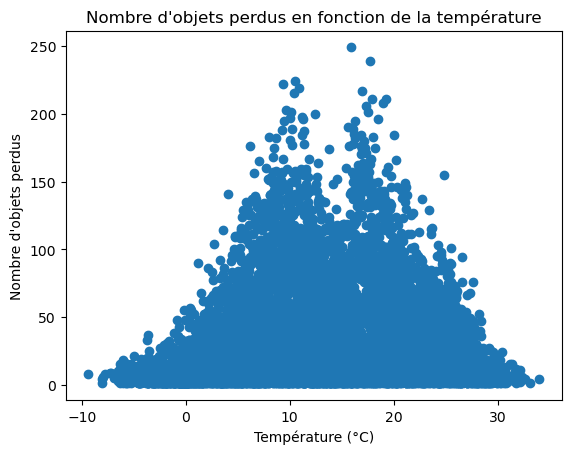

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
# Chargement des données à partir d'un fichier CSV
data = pd.read_csv('merge_final.csv')

# Sélection des colonnes "lost_objects" et "temperature" du DataFrame
Objets_perdus = data['nb_lost_item']
temperature = data['temperature_moyenne']

# Création du scatterplot
plt.scatter(temperature,Objets_perdus)

# Ajout d'un titre et de labels pour les axes
plt.title('Nombre d\'objets perdus en fonction de la température')
plt.xlabel('Température (°C)')
plt.ylabel('Nombre d\'objets perdus')

# Afficher le graphique
plt.show()

In [104]:
data.corr()

,temperature_moyenne,nb_lost_item
temperature_moyenne,1.000000,0.077594
nb_lost_item,0.077594,1.000000


In [105]:
#On remarque que  quant la température est basse et que quand la température est trés haute  , plus les gens perdent moins d'objets  que duant la température est moyenne , on constate que les objets perdus ne corréle pas avec la température.

### Question 2

In [106]:
import csv
from statistics import median
import datetime 
import sqlite3
import pandas as pd

connexion=sqlite3.connect('db.sqlite')
req="SELECT objet , date FROM PerteObjet"
df=pd.read_sql(req,connexion, parse_dates=True )
df['date']=pd.to_datetime(df['date'])
df['date']
df.set_index('date', inplace=True)

df = df.groupby([pd.Grouper(freq = 'd')]).agg(nb_objets = ('objet' , 'count'))

# Création de la colonne 'saison'
def mois_en_saison(month):
    if month in [12,1,2]:
        return "hiver"
    if month in [3,4,5]:
        return "printemps"
    if month in [6,7,8]:
        return "ete"
    if month in [9,10,11]:
        return "automne"
    
df = df.reset_index()
df["saison"] = df["date"].dt.month.apply(lambda x:mois_en_saison(x))

df.groupby('saison').median()

/tmp/ipykernel_31791/231453915.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('saison').median()


,nb_objets
saison,
automne,442.0
ete,427.0
hiver,425.0
printemps,346.0


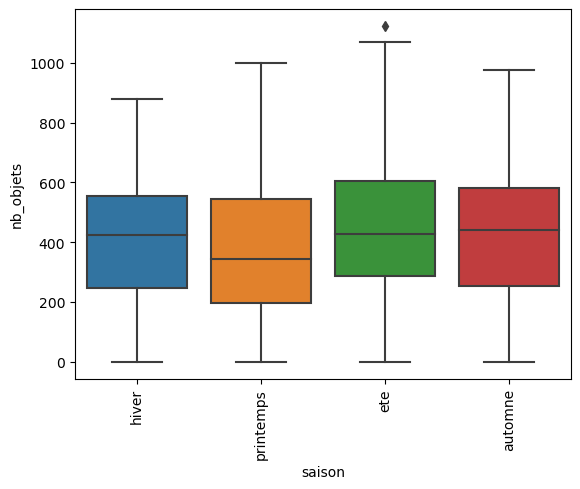

In [107]:
import seaborn as sns

sns.boxplot(x='saison', y='nb_objets', data=df)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', labelsize=10)
plt.show()

In [111]:
f_oneway_res =  stats.f_oneway(df["nb_objets"], df['saison']=="hiver",df['saison']=="printemps",df['saison']=="ete",df['saison']=="automne")
f_oneway_res

F_onewayResult(statistic=7636.496988482073, pvalue=0.0)

(array([218., 246., 393., 333., 423., 353., 142.,  65.,  17.,   2.]),
 array([   0. ,  112.2,  224.4,  336.6,  448.8,  561. ,  673.2,  785.4,
         897.6, 1009.8, 1122. ]),
 <BarContainer object of 10 artists>)

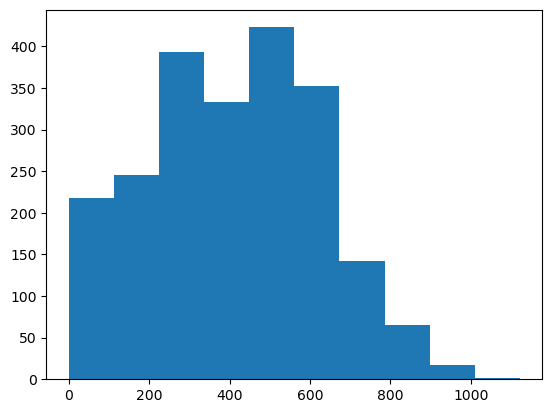

In [113]:
plt.hist(df['nb_objets'])